In [1]:
#importing libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.stats as st
import requests
import warnings
%matplotlib inline
import seaborn as sns

In [2]:
#using curated csv file for airbnb open data for New York city from Kaggle
airbnbNY =pd.read_csv("data/AB_NYC_2019.csv")
airbnbNY.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
#eunique values of neighbourhood_group
airbnbNY.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

## Focusing on specific neighbourhood for analysis - Staten Island

In [4]:
airbnbNY_StatenIsland = airbnbNY.loc[airbnbNY['neighbourhood_group'] == 'Staten Island']
airbnbNY_StatenIsland.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
169,42882,New York room with a view,185978,Newyorkroomwithaview,Staten Island,St. George,40.64524,-74.08088,Private room,70,2,166,2019-06-13,1.66,1,312
249,62452,A SpeciaL!! Private Room in NY,303939,Lissette,Staten Island,Tompkinsville,40.63536,-74.08537,Private room,36,2,193,2019-06-25,1.85,6,360
250,62461,B NYC Staten Alternative...,303939,Lissette,Staten Island,Tompkinsville,40.63627,-74.08543,Private room,37,2,147,2019-06-10,1.44,6,0
251,62787,C Private Room By The Ferry,303939,Lissette,Staten Island,Tompkinsville,40.63518,-74.08546,Private room,37,2,177,2019-07-02,1.71,6,320
256,63320,D Private Che@p Room 2 Explore NYC,303939,Lissette,Staten Island,Tompkinsville,40.63481,-74.08519,Private room,36,2,333,2019-07-02,3.19,6,340


In [5]:
#dropping columns that are not significant for our data exploration and predictions
# airbnbNY_StatenIsland.drop(['id','host_name','last_review'], axis=1, inplace=True)

del airbnbNY_StatenIsland['id'],airbnbNY_StatenIsland['name'], airbnbNY_StatenIsland['host_name']
airbnbNY_StatenIsland.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
169,185978,Staten Island,St. George,40.64524,-74.08088,Private room,70,2,166,2019-06-13,1.66,1,312
249,303939,Staten Island,Tompkinsville,40.63536,-74.08537,Private room,36,2,193,2019-06-25,1.85,6,360
250,303939,Staten Island,Tompkinsville,40.63627,-74.08543,Private room,37,2,147,2019-06-10,1.44,6,0
251,303939,Staten Island,Tompkinsville,40.63518,-74.08546,Private room,37,2,177,2019-07-02,1.71,6,320
256,303939,Staten Island,Tompkinsville,40.63481,-74.08519,Private room,36,2,333,2019-07-02,3.19,6,340


# Data preparation

In [6]:
#len(airbnbNY)
len(airbnbNY_StatenIsland)

373

In [7]:
#checking data type for columns
airbnbNY_StatenIsland.dtypes

host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [8]:
#checking null values
#airbnbNY_StatenIsland.count()
airbnbNY_StatenIsland.isnull().sum()

host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                       59
reviews_per_month                 59
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [9]:
#replacing null values in reviews_per_month to 0 and last_review to end of time (9999-12-31)

airbnbNY_StatenIsland.loc[:, 'reviews_per_month'] = airbnbNY_StatenIsland.loc[:, 'reviews_per_month'].fillna(0)
airbnbNY_StatenIsland['last_review'] = airbnbNY_StatenIsland['last_review'].replace(np.nan, '9999-12-31') 
airbnbNY_StatenIsland

C:\Users\sujit\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-9-cec8fbd4ea00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnbNY_StatenIsland['last_review'] = airbnbNY_StatenIsland['last_review'].replace(np.nan, '9999-12-31')


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
169,185978,Staten Island,St. George,40.64524,-74.08088,Private room,70,2,166,2019-06-13,1.66,1,312
249,303939,Staten Island,Tompkinsville,40.63536,-74.08537,Private room,36,2,193,2019-06-25,1.85,6,360
250,303939,Staten Island,Tompkinsville,40.63627,-74.08543,Private room,37,2,147,2019-06-10,1.44,6,0
251,303939,Staten Island,Tompkinsville,40.63518,-74.08546,Private room,37,2,177,2019-07-02,1.71,6,320
256,303939,Staten Island,Tompkinsville,40.63481,-74.08519,Private room,36,2,333,2019-07-02,3.19,6,340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48441,233485864,Staten Island,New Dorp Beach,40.56506,-74.10240,Private room,40,1,0,9999-12-31,0.00,2,341
48446,444904,Staten Island,St. George,40.64005,-74.07987,Entire home/apt,100,365,0,9999-12-31,0.00,1,342
48533,28586423,Staten Island,Stapleton,40.62878,-74.07301,Entire home/apt,450,5,0,9999-12-31,0.00,1,88
48649,201187671,Staten Island,Shore Acres,40.61283,-74.06625,Private room,54,4,0,9999-12-31,0.00,1,89


In [10]:
airbnbNY_StatenIsland.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.730000e+02,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,9.853360e+07,40.610225,-74.105805,114.812332,4.831099,30.941019,1.576381,2.319035,199.678284
std,7.954340e+07,0.032419,0.036400,277.620403,19.727605,44.830766,1.690710,1.915580,131.852000
min,1.552300e+04,40.499790,-74.244420,13.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2.505997e+07,40.593720,-74.123930,50.000000,1.000000,1.000000,0.260000,1.000000,78.000000
50%,9.249339e+07,40.621540,-74.089300,75.000000,2.000000,12.000000,1.000000,1.000000,219.000000
75%,1.581790e+08,40.634740,-74.081070,110.000000,3.000000,42.000000,2.310000,3.000000,333.000000
max,2.725577e+08,40.647790,-74.060920,5000.000000,365.000000,333.000000,10.120000,8.000000,365.000000


* Understanding unique values and categorical data 

In [11]:
# unique values of neighbourhood 
len(airbnbNY_StatenIsland.neighbourhood.unique())

43

In [13]:
# unique values of the room type
airbnbNY_StatenIsland.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

## Data Exploration and Visualization

In [52]:
#checking hosts with max and min listing to see if the market is dominated by specific host or a fair market
top_host_max = airbnbNY_StatenIsland.host_id.value_counts().max()
top_host_min = airbnbNY_StatenIsland.host_id.value_counts().min()
top_host_average = airbnbNY_StatenIsland.host_id.value_counts().mean()
#top_host_average = airbnbNY_StatenIsland.host_id.value_counts().std()
    
    
print(f'Maximim listings by hosts :{top_host_max}')
print(f'Minimum listings by hosts :{top_host_min}')
print(f'Average listings by hosts :{top_host_average}')

Maximim listings by hosts :8
Minimum listings by hosts :1
Average listings by hosts :1.1158876599406604


In [27]:
# exploring price
airbnbNY_StatenIsland[['price']].describe()

# minP = airbnbNY_StatenIsland[['price']].min()
# maxP = airbnbNY_StatenIsland[['price']].max()
# avgP = airbnbNY_StatenIsland[['price']].mean()

# print(f'Minimum price listed:{minP}')
# print(f'Maximum price listed:{maxP}')
# print(f'Average price listed:{avgP}')

,price
count,373.000000
mean,114.812332
std,277.620403
min,13.000000
25%,50.000000
50%,75.000000
75%,110.000000
max,5000.000000


In [29]:
#finding top 5 neghbourhoods in Staten Island
airbnbNY_StatenIsland['neighbourhood'].value_counts().head(5)

St. George       48
Tompkinsville    42
Stapleton        27
Concord          26
Arrochar         21
Name: neighbourhood, dtype: int64

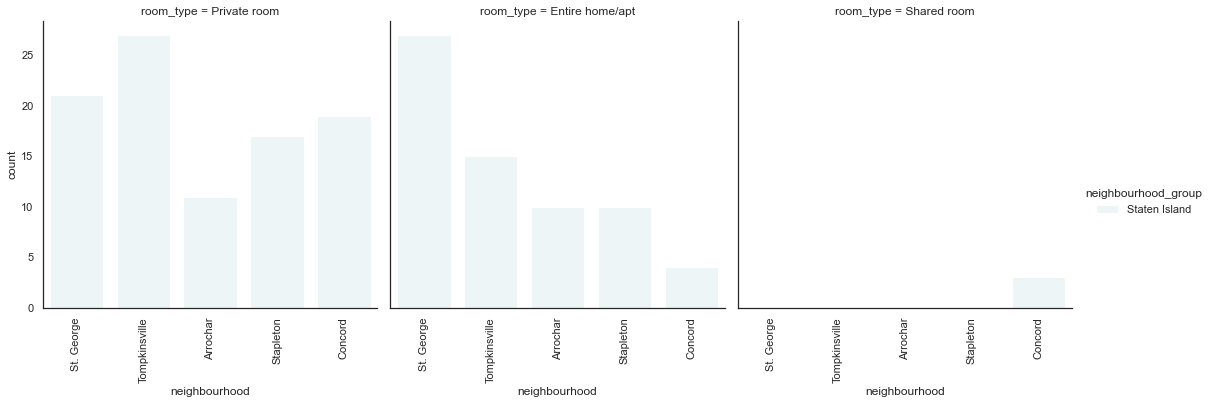

In [51]:
Viz1_df = airbnbNY_StatenIsland.loc[airbnbNY_StatenIsland['neighbourhood'].isin(['St. George','Tompkinsville', 'Stapleton',
                                                                            'Concord','Arrochar'])]
#using catplot to represent multiple interesting attributes together and a count
#number of observations in each category kind = count
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style('white')

#f, ax = plt.subplots(figsize=(8, 6))

viz1 = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=Viz1_df, kind='count')
viz1.set_xticklabels(rotation=90)
#viz1?
#sns.catplot?